In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

<AxesSubplot:xlabel='time'>

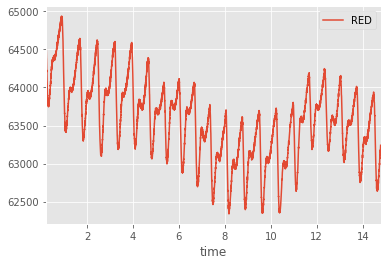

In [16]:
df = pd.read_csv('test_data.csv')
df.plot('time', 'RED')

### convolve, calculate gradient, and remove bad endpoints

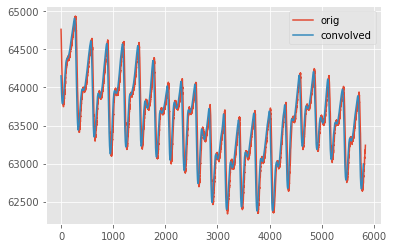

In [26]:
heart_rate_span = [10,250] # max span of heart rate
smoothing_size = 20 # convolution smoothing size

red_convolved = np.convolve(df['RED'], np.ones((smoothing_size,)), 'same') / smoothing_size
plt.plot(df['RED'], label='orig')
plt.plot(red_convolved[smoothing_size:-smoothing_size], label='convolved')
plt.legend()

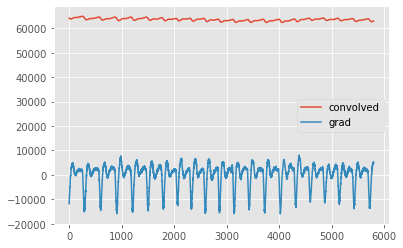

In [29]:
# derivative of filtered red signal - with time spacing  ??
red_grad = np.gradient(red_convolved, df['time'])
red_grad[0:int(smoothing_size/2)+1] = np.zeros((int(smoothing_size/2)+1,))
red_grad[-int(smoothing_size/2)-1:] = np.zeros((int(smoothing_size/2)+1,)) 

plt.plot(red_convolved[smoothing_size:-smoothing_size], label='convolved')
plt.plot(red_grad[smoothing_size:-smoothing_size], label='grad')
plt.legend()

### peak locator algorithm

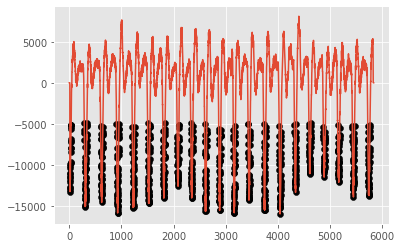

In [48]:
# look for the most farout data points
peak_locs = np.where(red_grad<-np.std(red_grad))
plt.scatter(peak_locs,red_grad[peak_locs] , color='k')
plt.plot(red_grad)

In [49]:
t_vec = df['time']
# min time between samples (while 250BPM)
min_time_bw_samps = (60.0/heart_rate_span[1])
prev_pk = peak_locs[0][0]
true_peak_locs,pk_loc_span = [],[]
for ii in peak_locs[0]:
    # collect samples from one peak
    if (t_vec[ii] - t_vec[prev_pk]) < min_time_bw_samps:
        pk_loc_span.append(ii)
    else:
            true_peak_locs.append(int(np.mean(pk_loc_span)))
            pk_loc_span = []

    prev_pk = int(ii)

t_peaks = [t_vec[kk] for kk in true_peak_locs]
print('BPM: {0:2.1f}'.format(60.0/np.mean(np.diff(t_peaks))))

BPM: 84.2


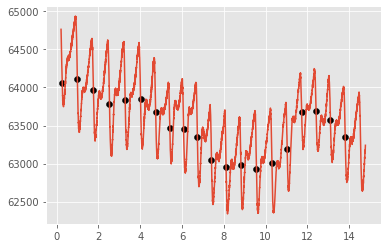

In [50]:
plt.scatter(df['time'][true_peak_locs], df['RED'][true_peak_locs],color='k')
plt.plot(df['time'], df['RED'])